In [1]:
import numpy as np 
from pathlib import Path
from src import db, fig1, utils
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import rcParams
default_font = 12
fs_title = 14
rcParams["font.family"] = "Arial"
rcParams["savefig.dpi"] = 300
rcParams["axes.spines.top"] = False
rcParams["axes.spines.right"] = False
rcParams["axes.titlelocation"] = "left"
rcParams["axes.titleweight"] = "normal"
rcParams["font.size"] = default_font
trial_type_palette = ['tab:green', 'tab:red', 'tab:cyan', 'tab:orange'] #rew #nrew #rew_test #nrew_test #GI

In [2]:
db = []
db.append({'mname': 'VG11', 'datexp': '2024_10_31', 'blk':'2'})
db.append({'mname': 'VG15', 'datexp': '2024_10_31', 'blk':'2'})
db.append({'mname': 'VG11', 'datexp': '2024_11_14', 'blk':'2'})
db.append({'mname': 'VG14', 'datexp': '2024_11_21', 'blk':'2'})
db.append({'mname': 'VG21', 'datexp': '2025_07_17', 'blk':'3'})
db.append({'mname': 'VG21', 'datexp': '2025_08_07', 'blk':'2'})
db.append({'mname': 'VG24', 'datexp': '2025_07_10', 'blk':'2'})

In [3]:
rows = []
for sess in range(len(db)):
    m = utils.load_mouse(db[sess]['mname'], db[sess]['datexp'], db[sess]['blk'], load_neurons=False, load_retinotopy=False, mdl_path=r"D:\mouseobj")
    prp_dict = utils.proportion_licks(m, lick_window=(150,250))
    #append to dataframe
    rows.append(prp_dict)
df = pd.DataFrame(rows)

Checking if model object exists ...
Loading mouse object from D:\mouseobj\VG11\2024_10_31\2
Existing mouse object has the following attributes:
dict_keys(['name', 'datexp', 'blk', 'data_path', '_timeline', '_data_var', '_settings', '_timestamps', '_trial_info', '_spks', '_ypos', '_xpos', '_iplane', '_stat', '_ops', '_snr', 'xy_t', 'iarea', 'iregion', 'outline', 'frameselector', 'isred', 'trial_dict', 'interp_spks', 'train_dp'])
Checking if model object exists ...
Loading mouse object from D:\mouseobj\VG15\2024_10_31\2
Existing mouse object has the following attributes:
dict_keys(['name', 'datexp', 'blk', 'data_path', '_timeline', '_data_var', '_settings', '_timestamps', '_trial_info', '_spks', '_ypos', '_xpos', '_iplane', '_stat', '_ops', '_snr', 'xy_t', 'iarea', 'iregion', 'outline', 'frameselector', 'isred', 'trial_dict', 'interp_spks', 'train_dp'])
Checking if model object exists ...
Loading mouse object from D:\mouseobj\VG11\2024_11_14\2
Existing mouse object has the following attr

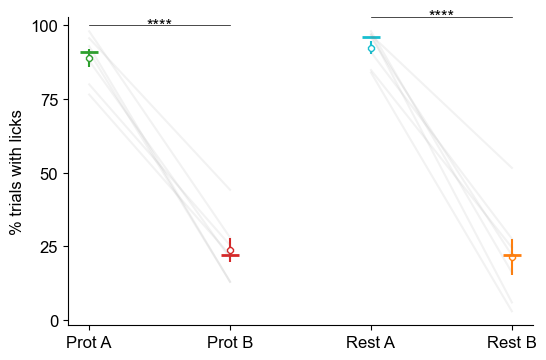

In [4]:
fig, ax = plt.subplots(figsize=(6, 4))
fig1.lick_averages(df, ax)

In [5]:
df.to_csv("../data/overall/behavior_df.csv", index=False)

In [6]:
df

,rewarded test,rewarded,non rewarded test,non rewarded
0,0.848485,0.800000,0.246154,0.253968
1,0.980000,0.910000,0.161616,0.130000
2,0.969697,0.980000,0.060000,0.280000
3,0.967742,0.956522,0.516484,0.442105
4,0.840000,0.929293,0.030000,0.130000
5,0.959596,0.880000,0.220000,0.210000
6,0.909091,0.765432,0.276316,0.220779


In [11]:
#check normality of each column with various tests
from scipy import stats
for col in df.columns:
    k2, p = stats.shapiro(df[col])
    print(f"{col}: p={p}")
    if p < 0.05:
        print(f"{col} is not normally distributed")
    else:
        print(f"{col} is normally distributed")
#all columns are normally distributed
from scipy.stats import levene

# Get all numeric columns
numeric_cols = df.select_dtypes(include=[float, int]).columns

# Levene's test for homogeneity of variances across columns
stat, p = levene(df["rewarded"], df["non rewarded"])
print(f"Levene's test p-value: {p}")
if p < 0.05:
    print("Variances are not homogeneous")
else:
    print("Variances are homogeneous")
stat, p = levene(df["rewarded test"], df["non rewarded test"])
print(f"Levene's test p-value: {p}")
if p < 0.05:
    print("Variances are not homogeneous")
else:
    print("Variances are homogeneous")

rewarded test: p=0.06141229346394539
rewarded test is normally distributed
rewarded: p=0.5229302048683167
rewarded is normally distributed
non rewarded test: p=0.502820611000061
non rewarded test is normally distributed
non rewarded: p=0.2734829783439636
non rewarded is normally distributed
Levene's test p-value: 0.7281073195160881
Variances are homogeneous
Levene's test p-value: 0.15998161725073448
Variances are homogeneous
